# Feynn Labs Internship
### **Project-3**

> By Kavuluru Lakshmi Srinidhi


# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt

# Import Customer Company Dataset
(eg: Here, a dataset of clothing ratings and reviews is present)

In [ ]:
dataset = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = dataset[['Review Text','Rating','Class Name','Age']]
df.head()

,Review Text,Rating,Class Name,Age
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates,33
1,Love this dress! it's sooo pretty. i happene...,5,Dresses,34
2,I had such high hopes for this dress and reall...,3,Dresses,60
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,50
4,This shirt is very flattering to all due to th...,5,Blouses,47


# Exploratory Data Analysis (EDA)

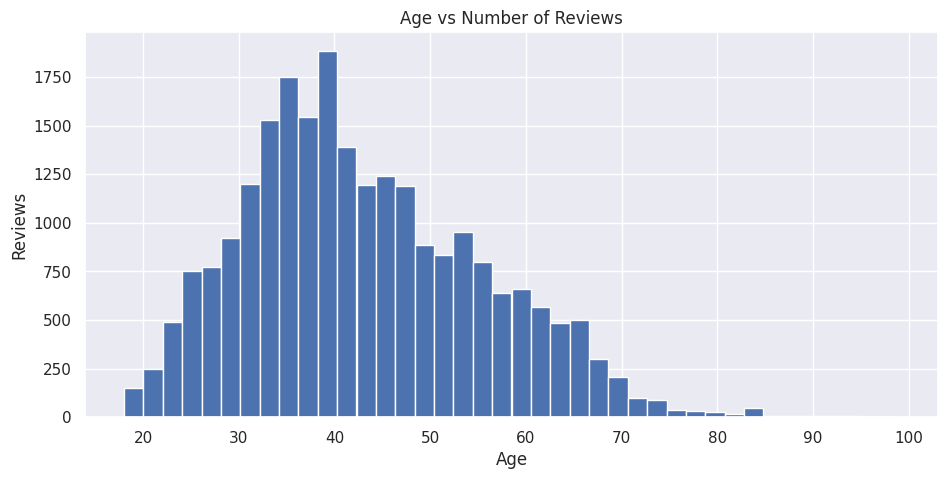

In [ ]:
# Age vs Number of reviews
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Age vs Number of Reviews');

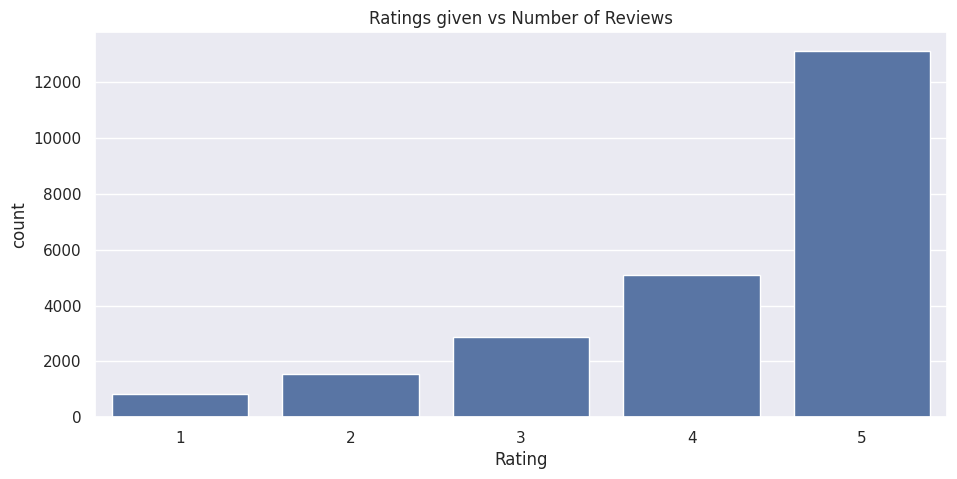

In [ ]:
plt.title('Ratings given vs Number of Reviews')
sns.countplot(x = 'Rating', data = df);

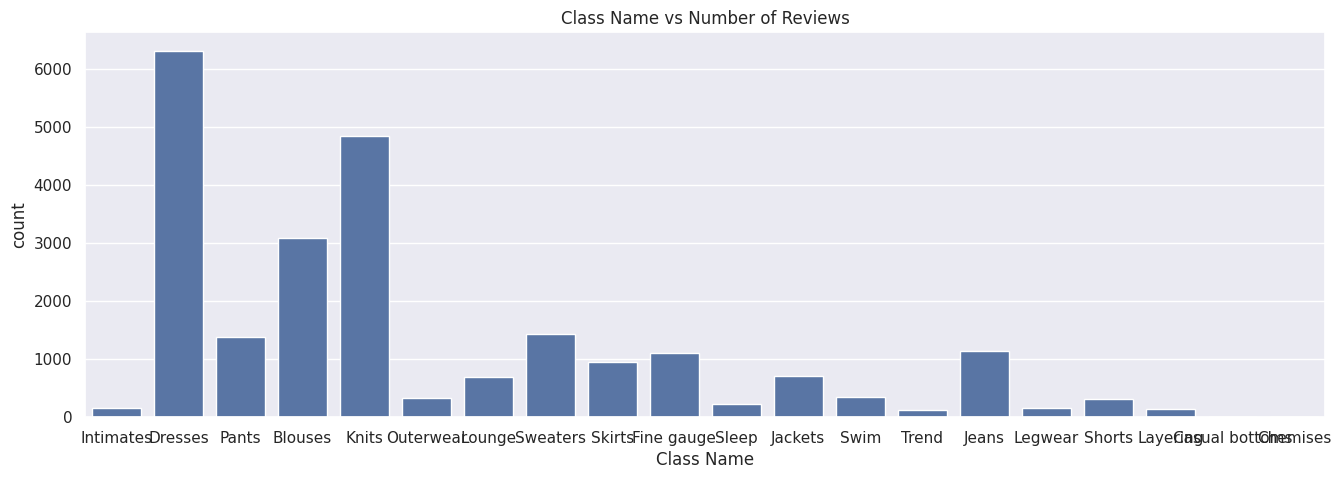

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
plt.title('Class Name vs Number of Reviews')
sns.countplot(x = 'Class Name', data = df);

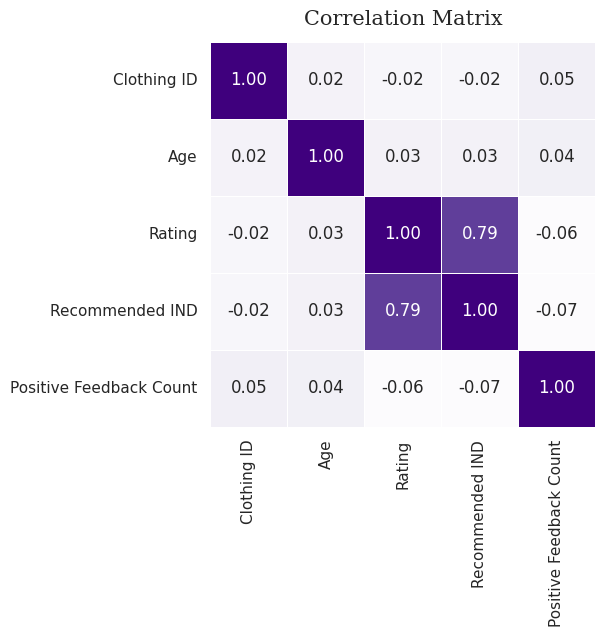

In [ ]:
# Correlation Matrix
df.head()
sns.heatmap(data=dataset[['Clothing ID',	'Age', 'Rating', 'Recommended IND',	'Positive Feedback Count']].corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

 # <span id="6"></span> Building a Sentiment Analysis Classifier

In [ ]:
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
# select the columns and
# prepare data for the models
X_train = vectorizer.fit_transform(train_data['Review Text'].values.astype('U'))
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'].values.astype('U'))
y_test = test_data['Sentiment']

Then, I fitted the models one by one. Since, some of them take too much time, running each of them in different cells is a better choice.   

## <span id="7"></span> Logistic Regression

              precision    recall  f1-score   support

       False       0.77      0.64      0.70       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.86      0.81      0.83      4123
weighted avg       0.94      0.94      0.94      4123



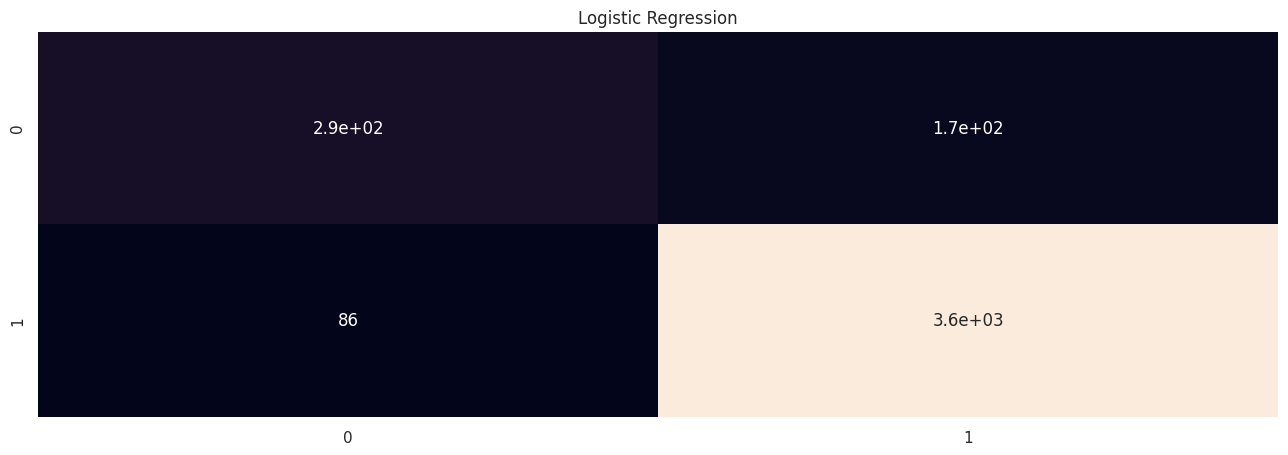

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True,cbar=False);

print(mt.classification_report(y_test, lr.predict(X_test)))

## <span id="8"></span> Naive Bayes

              precision    recall  f1-score   support

       False       0.79      0.66      0.71       458
        True       0.96      0.98      0.97      3665

    accuracy                           0.94      4123
   macro avg       0.87      0.82      0.84      4123
weighted avg       0.94      0.94      0.94      4123



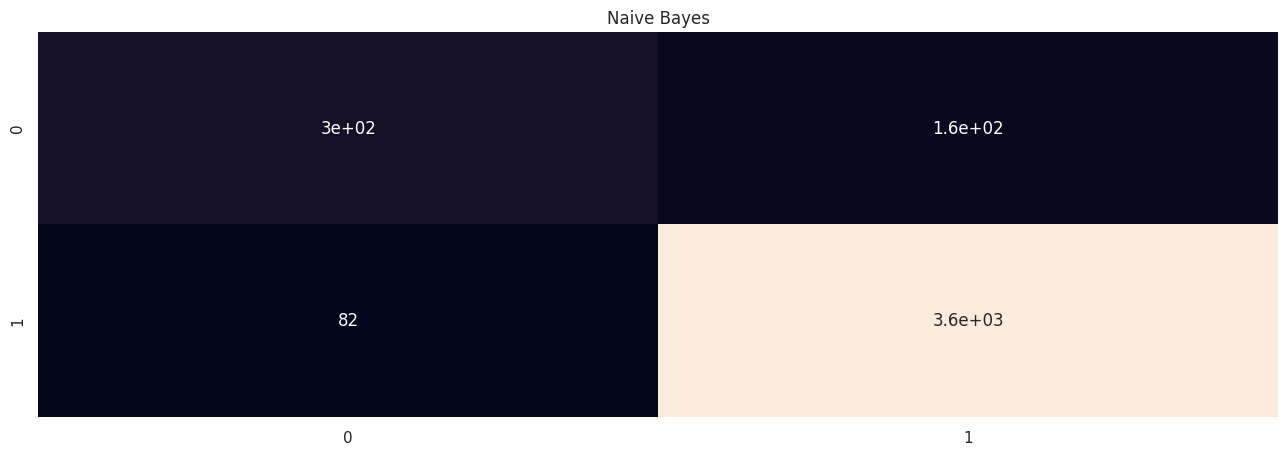

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True,cbar=False);

print(mt.classification_report(y_test, nb.predict(X_test)))

## <span id="9"></span> Support Vector Machine (SVM)

              precision    recall  f1-score   support

       False       0.84      0.45      0.59       458
        True       0.94      0.99      0.96      3665

    accuracy                           0.93      4123
   macro avg       0.89      0.72      0.77      4123
weighted avg       0.92      0.93      0.92      4123



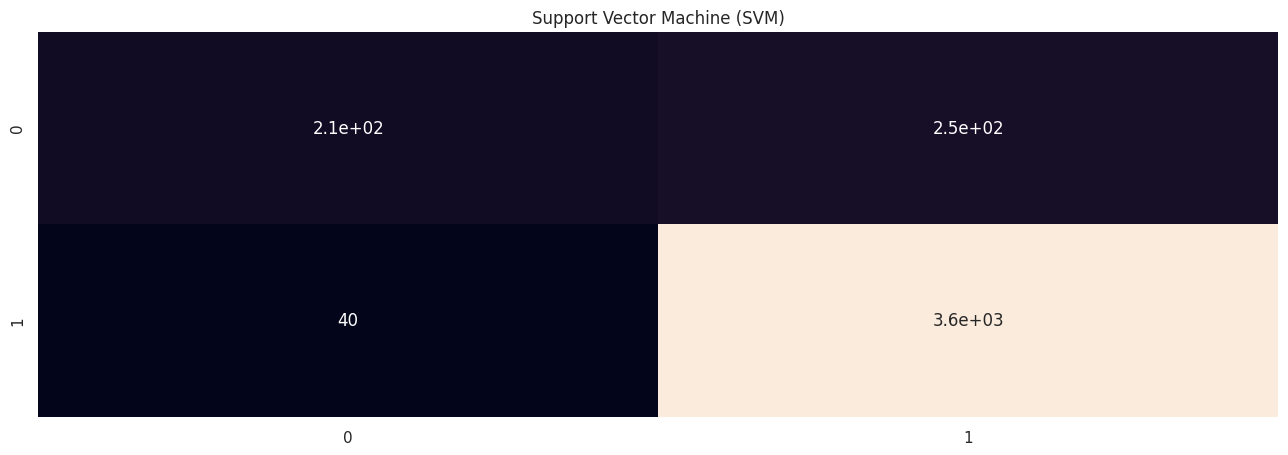

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True,cbar=False);

print(mt.classification_report(y_test, svm.predict(X_test)))

Let us consider Naive Bayes Classifier

In [67]:
df2 = train_data.copy()
df2[''] = nb.predict(X_train)
df2.head()

,Review Text,Rating,Class Name,Age,Sentiment,Naive Bayes
19218,I love this dress's gentle blue lace. the silh...,5,Dresses,35,True,True
3530,Beautiful choice...beautiful fit for my daught...,5,Knits,51,True,True
15663,"If you are shaped anything like me, you will h...",4,Dresses,25,True,True
21310,This top is so cute and of spectacular quality...,5,Blouses,33,True,True
15154,First saw this poncho on a petite blog and aft...,5,Sweaters,56,True,True
